<a href="https://colab.research.google.com/github/MiekeNap/DataAnalytics_SharkAttack/blob/main/Shark_attack_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark attack
Q1) what are the most dangerous types of sharks to humans?

Q2) are children more likely to be attacked by sharks?

Q3) are shark attacks where sharks were provoked more or less dangerous?

Q4) are certain activities more likely to result in a shark attack?

How I planned the assignment:
- check data for missing values (nulls and non-nulls)
- if relevant: replace missing values
- transform data if required
- visualization of possible trends


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

import matplotlib.font_manager
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
import plotly.express as px 
from scipy import stats

%load_ext google.colab.data_table

In [2]:
attacks = '/content/drive/MyDrive/Colab Notebooks/attacks.csv'

df = pd.read_csv(attacks, encoding='cp1252')
display(df)

Case Number         Date    Year        Type    Country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  Area                        Location     Activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Glynn County     Standing   
2               Hawaii                    Habush, Oahu      Surfing   
3      New South Wales              Arrawarra Headland      Surfing   
4               Colima                        La Ticla  Free diving   
...                ...                             ...          ...   
25718              NaN                             NaN          NaN   
25719              NaN                             NaN          NaN   
25720              NaN                             NaN          NaN   
25721              NaN                             NaN          NaN   
25722              NaN                             NaN          NaN   

                  Name Sex   ...         Species   \
0          Julie Wolfe    F  ...      White shark   
1      Adyson McNeely     F  ...              NaN   
2          John Denges    M  ...              NaN   
3                 male    M  ...        2 m shark   
4       Gustavo Ramos     M  ...  Tiger shark, 3m   
...                ...  ...  ...              ...   
25718              NaN  NaN  ...              NaN   
25719              NaN  NaN  ...              NaN   
25720              NaN  NaN  ...              NaN   
25721              NaN  NaN  ...              NaN   
25722              NaN  NaN  ...              NaN   

               Investigator or Source                       pdf  \
0                    R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1      K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2      K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3                      B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4                           A .Kipper      2018.06.04-Ramos.pdf   
...                               ...                       ...   
25718                             NaN                       NaN   
25719                             NaN                       NaN   
25720                             NaN                       NaN   
25721                             NaN                       NaN   
25722                             NaN                       NaN   

                                            href formula  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...   
1      http://sharkattackfile.net/spreadsheets/pdf_di...   
2      http://sharkattackfile.net/spreadsheets/pdf_di...   
3      http://sharkattackfile.net/spreadsheets/pdf_di...   
4      http://sharkattackfile.net/spreadsheets/pdf_di...   
...                                                  ...   
25718                                                NaN   
25719                                                NaN   
25720                                                NaN   
25721                                                NaN   
25722                                                NaN   

                                                    href Case Number.1  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1      http://sharkattackfile.net/spreadsheets/pdf_di...    2

In [3]:
average_null_data = round(df.isnull().mean() * 100)
average_null_data

Case Number                66.0
Date                       76.0
Year                       76.0
Type                       76.0
Country                    76.0
Area                       77.0
Location                   78.0
Activity                   78.0
Name                       76.0
Sex                        78.0
Age                        87.0
Injury                     76.0
Fatal (Y/N)                78.0
Time                       89.0
Species                    87.0
Investigator or Source     76.0
pdf                        76.0
href formula               76.0
href                       76.0
Case Number.1              76.0
Case Number.2              76.0
original order             75.0
Unnamed: 22               100.0
Unnamed: 23               100.0
dtype: float64

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

relevant columns:
types of sharks = 'Species',
children = 'Age' (<19),
provoked or other = 'Type',
certain activities = 'Activity'

In [5]:
# Drop multiple columns
df2 = df.drop(columns=['Case Number', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Name', 'Sex ', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'])
df2

Type     Activity  Age  \
0         Boating     Paddling   57   
1      Unprovoked     Standing   11   
2         Invalid      Surfing   48   
3      Unprovoked      Surfing  NaN   
4        Provoked  Free diving  NaN   
...           ...          ...  ...   
25718         NaN          NaN  NaN   
25719         NaN          NaN  NaN   
25720         NaN          NaN  NaN   
25721         NaN          NaN  NaN   
25722         NaN          NaN  NaN   

                                                  Injury Fatal (Y/N)  \
0      No injury to occupant, outrigger canoe and pad...           N   
1                             Minor injury to left thigh           N   
2           Injury to left lower leg from surfboard skeg           N   
3                              Minor injury to lower leg           N   
4      Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                  ...         ...   
25718                                                NaN         NaN   
25719                                                NaN         NaN   
25720                                                NaN         NaN   
25721                                                NaN         NaN   
25722                                                NaN         NaN   

              Species   
0          White shark  
1                  NaN  
2                  NaN  
3            2 m shark  
4      Tiger shark, 3m  
...                ...  
25718              NaN  
25719              NaN  
25720              NaN  
25721              NaN  
25722              NaN  

[25723 rows x 6 columns]

In [6]:
# drop all lines with missing data in all columns
df3 = df2.dropna(how='all')
df3

Type      Activity  Age  \
0        Boating      Paddling   57   
1     Unprovoked      Standing   11   
2        Invalid       Surfing   48   
3     Unprovoked       Surfing  NaN   
4       Provoked   Free diving  NaN   
...          ...           ...  ...   
6297  Unprovoked        Diving  NaN   
6298  Unprovoked  Pearl diving  NaN   
6299  Unprovoked      Swimming  NaN   
6300  Unprovoked           NaN  NaN   
6301  Unprovoked      Swimming   15   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
6297                                              FATAL           Y   
6298                                              FATAL           Y   
6299                                              FATAL           Y   
6300                                              FATAL           Y   
6301  FATAL. "Shark bit him in half, carrying away t...           Y   

             Species   
0         White shark  
1                 NaN  
2                 NaN  
3           2 m shark  
4     Tiger shark, 3m  
...               ...  
6297              NaN  
6298              NaN  
6299              NaN  
6300              NaN  
6301              NaN  

[6302 rows x 6 columns]

In [7]:
average_null_data = round(df3.isnull().mean() * 100)
average_null_data

Type            0.0
Activity        9.0
Age            45.0
Injury          0.0
Fatal (Y/N)     9.0
Species        45.0
dtype: float64

In [8]:
def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)

# A
def look_at_unique_values(column): 
  unique_values_cutoff = 50
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values:")
    # We may get an error when sorting
    try:
      sorted = np.sort(unique_values)
      print("Values are sorted")
      display(list(sorted))
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")

# B
def look_at_edges(df, column_name):
  # inner function
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  column = df[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f"Could not sort values: {error}")
      print("..so let's try filtering NULL values and then sorting")
      non_null_uniques = df.loc[~df[column_name].isnull(), column_name].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)

# C
def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")

# D
def find_non_default_missing_values(df, column_name, maybe_type):
  long_separator_amount = 80
  short_separator_amount = 40

  print_separator("*", long_separator_amount, f"Finding non default missing values for column \"{column_name}\"")

  print(f"Column \"{column_name}\" has datatype: {df.dtypes[column_name]}")

  column = df[column_name]
  
  # A
  print_separator("-", short_separator_amount, "A: Looking at unique values")
  look_at_unique_values(column)

  # B
  print_separator("-", short_separator_amount, "B: Sorting and looking at the edges")
  look_at_edges(df, column_name)

  # C
  print_separator("-", short_separator_amount, f"C: Casting to type: {maybe_type}")
  cast_to_type(column, maybe_type)

  # D
  print_separator("-", short_separator_amount, "D: Looking at frequency")
  display(column.value_counts(dropna=False))

  print("\n")

def replace_value(df, column_name, missing_old, missing_new):
  # ⚠️ Mutates df
  df[column_name] = df[column_name].replace({missing_old: missing_new})

# Helper functions
def display_default_null_values(df, column_name):
  nulls = df.loc[df[column_name].isnull()]
  print(f"Number of default null values in \"{column_name}\": {len(nulls)}")

In [9]:
df3.Type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [10]:
# Type
# df3.loc[lambda df: df['Type'] == 'Provoked', :]
# when looking at the data generally boat or boating usually belonged to unprovoked incidents
replace_value(df3,'Type', 'Boatomg', 'Unprovoked')
replace_value(df3,'Type', 'Boating', 'Unprovoked')
replace_value(df3,'Type', 'Boat', 'Unprovoked')
find_non_default_missing_values(df3, 'Type', 'string')



********************************************************************************
Finding non default missing values for column "Type"
********************************************************************************
Column "Type" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 50 unique values:
Could not sort values


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['Unprovoked', 'Invalid', 'Provoked', 'Questionable', 'Sea Disaster', nan]



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


['Invalid', 'Provoked', 'Questionable', 'Sea Disaster', 'Unprovoked']

['Invalid', 'Provoked', 'Questionable', 'Sea Disaster', 'Unprovoked']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


Unprovoked      4936
Provoked         574
Invalid          547
Sea Disaster     239
NaN                4
Questionable       2
Name: Type, dtype: int64

In [11]:
# df3.loc[lambda df: df['Type'] == 'Invalid', :]
# in case Type is 'Invalid' shark involvement was not confirmed or questionable. Therefore I excluded these lines from the data.
df4 = df3.loc[lambda df: df['Type'] != 'Invalid', :]
display(df4)

Type      Activity  Age  \
0     Unprovoked      Paddling   57   
1     Unprovoked      Standing   11   
3     Unprovoked       Surfing  NaN   
4       Provoked   Free diving  NaN   
5     Unprovoked  Kite surfing  NaN   
...          ...           ...  ...   
6297  Unprovoked        Diving  NaN   
6298  Unprovoked  Pearl diving  NaN   
6299  Unprovoked      Swimming  NaN   
6300  Unprovoked           NaN  NaN   
6301  Unprovoked      Swimming   15   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
5                               No injury, board bitten           N   
...                                                 ...         ...   
6297                                              FATAL           Y   
6298                                              FATAL           Y   
6299                                              FATAL           Y   
6300                                              FATAL           Y   
6301  FATAL. "Shark bit him in half, carrying away t...           Y   

             Species   
0         White shark  
1                 NaN  
3           2 m shark  
4     Tiger shark, 3m  
5                 NaN  
...               ...  
6297              NaN  
6298              NaN  
6299              NaN  
6300              NaN  
6301              NaN  

[5755 rows x 6 columns]

In [12]:
# Age 
replace_value(df4,'Age', ' ', np.nan)
replace_value(df4,'Age', '  ', np.nan)
replace_value(df4,'Age', '\xa0 ', np.nan)
find_non_default_missing_values(df4, 'Age', 'float64')



********************************************************************************
Finding non default missing values for column "Age"
********************************************************************************
Column "Age" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 50 unique values (total: 145)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[' 28',
 ' 30',
 ' 43',
 '"middle-age"',
 '"young"',
 '(adult)',
 '1',
 '10',
 '10 or 12',
 '11']

['Elderly',
 'F',
 'MAKE LINE GREEN',
 'Teen',
 'Teens',
 'X',
 'adult',
 'mid-30s',
 'teen',
 'young']



----------------------------------------
C: Casting to type: float64
----------------------------------------
Could not cast to float64: could not convert string to float: '40s'


----------------------------------------
D: Looking at frequency
----------------------------------------


NaN         2526
18           143
17           140
15           137
16           136
            ... 
74             1
45             1
21 or 26       1
20             1
13 or 14       1
Name: Age, Length: 145, dtype: int64

In [13]:
# Activity
find_non_default_missing_values(df4, 'Activity', 'string')



********************************************************************************
Finding non default missing values for column "Activity"
********************************************************************************
Column "Activity" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 50 unique values (total: 1419)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '"Swimming vigorously"',
 '.']

['male',
 'native boats sunk in storm',
 'preparing to go skin diving',
 'pêcheur de bichiques',
 'ship M.V. Rizal sank during typhoon',
 'ship William Penn grounded & broke apart',
 'ship torpedoed 400 miles off the African coas. Man was clinging to hatch cover',
 'wreck of the State Oil Company ship Permina',
 'yachting accident',
 'yachtsman in a zodiac']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


Surfing                                 931
Swimming                                779
NaN                                     422
Fishing                                 411
Spearfishing                            307
                                       ... 
Sight-seeing                              1
Surf-fishing                              1
Freediving for abalone (at surface)       1
Scuba diving for lobsters                 1
Wreck of  large double sailing canoe      1
Name: Activity, Length: 1419, dtype: int64

In [14]:
# Fatal (Y/N)
replace_value(df4,'Fatal (Y/N)', ' N', 'N')
replace_value(df4,'Fatal (Y/N)', 'N ', 'N')
replace_value(df4,'Fatal (Y/N)', 'y', 'Y')
#replace_value(df,'Fatal (Y/N)', '\xa0 ', None)
find_non_default_missing_values(df4, 'Fatal (Y/N)', 'string')



********************************************************************************
Finding non default missing values for column "Fatal (Y/N)"
********************************************************************************
Column "Fatal (Y/N)" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 50 unique values:
Could not sort values


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['N', 'Y', nan, 'M', 'UNKNOWN', '2017']



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


['2017', 'M', 'N', 'UNKNOWN', 'Y']

['2017', 'M', 'N', 'UNKNOWN', 'Y']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


N          4287
Y          1381
UNKNOWN      70
NaN          15
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [15]:
# df4.loc[lambda df: df['Fatal (Y/N)'] != 'UNKNOWN', :]
# when it is unknown if incident was fatal, often other (relevant) details are unknown. Therefore I excluded these data from the table.
df5 = (df4.loc[lambda df: df['Fatal (Y/N)'] != 'UNKNOWN', :])
df5

Type      Activity  Age  \
0     Unprovoked      Paddling   57   
1     Unprovoked      Standing   11   
3     Unprovoked       Surfing  NaN   
4       Provoked   Free diving  NaN   
5     Unprovoked  Kite surfing  NaN   
...          ...           ...  ...   
6297  Unprovoked        Diving  NaN   
6298  Unprovoked  Pearl diving  NaN   
6299  Unprovoked      Swimming  NaN   
6300  Unprovoked           NaN  NaN   
6301  Unprovoked      Swimming   15   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
5                               No injury, board bitten           N   
...                                                 ...         ...   
6297                                              FATAL           Y   
6298                                              FATAL           Y   
6299                                              FATAL           Y   
6300                                              FATAL           Y   
6301  FATAL. "Shark bit him in half, carrying away t...           Y   

             Species   
0         White shark  
1                 NaN  
3           2 m shark  
4     Tiger shark, 3m  
5                 NaN  
...               ...  
6297              NaN  
6298              NaN  
6299              NaN  
6300              NaN  
6301              NaN  

[5685 rows x 6 columns]

In [ ]:
# Species 
replace_value(df5,'Species ', ' ', None)
replace_value(df5,'Species ', '\xa0 ', None)
find_non_default_missing_values(df5, 'Species ', 'string')

In [17]:
display(df5)

Type      Activity  Age  \
0     Unprovoked      Paddling   57   
1     Unprovoked      Standing   11   
3     Unprovoked       Surfing  NaN   
4       Provoked   Free diving  NaN   
5     Unprovoked  Kite surfing  NaN   
...          ...           ...  ...   
6297  Unprovoked        Diving  NaN   
6298  Unprovoked  Pearl diving  NaN   
6299  Unprovoked      Swimming  NaN   
6300  Unprovoked           NaN  NaN   
6301  Unprovoked      Swimming   15   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
5                               No injury, board bitten           N   
...                                                 ...         ...   
6297                                              FATAL           Y   
6298                                              FATAL           Y   
6299                                              FATAL           Y   
6300                                              FATAL           Y   
6301  FATAL. "Shark bit him in half, carrying away t...           Y   

             Species   
0         White shark  
1                 NaN  
3           2 m shark  
4     Tiger shark, 3m  
5                 NaN  
...               ...  
6297              NaN  
6298              NaN  
6299              NaN  
6300              NaN  
6301              NaN  

[5685 rows x 6 columns]

# Question 1
What are the most dangerous types of sharks to humans?

In [18]:
df6 = df5.loc[:, lambda df: ['Fatal (Y/N)', 'Species ']]
df6

Fatal (Y/N)         Species 
0              N      White shark
1              N              NaN
3              N        2 m shark
4              N  Tiger shark, 3m
5              N              NaN
...          ...              ...
6297           Y              NaN
6298           Y              NaN
6299           Y              NaN
6300           Y              NaN
6301           Y              NaN

[5685 rows x 2 columns]

In [19]:
df7 = df6.dropna()
df7

Fatal (Y/N)                                           Species 
0              N                                        White shark
3              N                                          2 m shark
4              N                                    Tiger shark, 3m
6              Y                                        Tiger shark
7              N                                    Lemon shark, 3'
...          ...                                                ...
6276           Y                                    12' tiger shark
6293           Y                                       Blue pointer
6294           Y                                       Blue pointer
6295           Y                                      Blue pointers
6296           Y  Said to involve a grey nurse shark that leapt ...

[2907 rows x 2 columns]

In [20]:
df8 = df7.rename(columns={'Fatal (Y/N)': 'fatal', 'Species ': 'species'})
df8

fatal                                            species
0        N                                        White shark
3        N                                          2 m shark
4        N                                    Tiger shark, 3m
6        Y                                        Tiger shark
7        N                                    Lemon shark, 3'
...    ...                                                ...
6276     Y                                    12' tiger shark
6293     Y                                       Blue pointer
6294     Y                                       Blue pointer
6295     Y                                      Blue pointers
6296     Y  Said to involve a grey nurse shark that leapt ...

[2907 rows x 2 columns]

In [21]:
df8.species.value_counts()

White shark                                                                                                                      157
Tiger shark                                                                                                                       73
Bull shark                                                                                                                        51
6' shark                                                                                                                          40
4' shark                                                                                                                          40
                                                                                                                                ... 
1.8 m to 2.4 m [6' to 8'] "black finned shark"                                                                                     1
White shark, 4.3 m [14']                                             

In [22]:
import re

# Create new column for the extracted Shark species
df8['newspecies'] = None

# species = list(df8['species'])
# species
# Regular Expression pattern used to extract shark species (ultimately getting everything in front of the word "shark")
shark_pattern = r'.* (shark|Shark)'

for row in range(len(df8)):
    try:
        shark_species = re.search(shark_pattern, df8.iat[row, df8.columns.get_loc('species')]).group()
        df8.iat[row, df8.columns.get_loc('newspecies')] = shark_species
    except:
        # Assuming that if there is nothing before string shark OR doesn't contain string shark at all,
        # then I will put the string Shark involvement not confirmed instead
        df8.iat[row, df8.columns.get_loc('newspecies')] = "Shark involvement not confirmed"

df8

fatal                                            species  \
0        N                                        White shark   
3        N                                          2 m shark   
4        N                                    Tiger shark, 3m   
6        Y                                        Tiger shark   
7        N                                    Lemon shark, 3'   
...    ...                                                ...   
6276     Y                                    12' tiger shark   
6293     Y                                       Blue pointer   
6294     Y                                       Blue pointer   
6295     Y                                      Blue pointers   
6296     Y  Said to involve a grey nurse shark that leapt ...   

                              newspecies  
0                            White shark  
3                              2 m shark  
4                            Tiger shark  
6                            Tiger shark  
7                            Lemon shark  
...                                  ...  
6276                     12' tiger shark  
6293     Shark involvement not confirmed  
6294     Shark involvement not confirmed  
6295     Shark involvement not confirmed  
6296  Said to involve a grey nurse shark  

[2907 rows x 3 columns]

In [56]:
fatalAttacks_species =  df8[(df8['fatal'] == 'Y') | (df8['fatal'] == 'N')]
fatalAttacks_species = fatalAttacks_species[(fatalAttacks_species.newspecies == 'White shark') | (fatalAttacks_species.newspecies == 'Tiger shark') |
                                               (fatalAttacks_species.newspecies == 'Bull shark') | (fatalAttacks_species.newspecies == 'Bronze whaler shark') | 
                                               (fatalAttacks_species.newspecies == 'Nurse shark')]
fatalAttacks_species =  fatalAttacks_species.groupby(['newspecies','fatal'])['species'].count().reset_index()

attack_map = {'Y':'Fatal Attack', 'N':'Non Fatal Attack'}
fatalAttacks_species[' '] = fatalAttacks_species['fatal'].map(attack_map)
fatalAttacks_species = fatalAttacks_species.rename(columns={'species':"Count"}) 


fig = px.bar(fatalAttacks_species, x='newspecies', y='Count', labels={'newspecies':'Species','Count':'Number of Attacks'}, 
             title = 'Fatal and non-fatal attacks related to sharks', color = ' ')

fig.show()


**Answer 1**
The most dangerous sharks to humans are the white shark (highest number of non-fatal as well as fatal attacks, with ~ 420 attacks in total), followed by the tiger shark (~ 230 attacks in total) and bull shark (~ 120 attacks in total).  The bronze and nurse shark caused about 50 attacks according to the data and were mostly non-fatal.

# Question 2
Are children more likely to be attacked by sharks?

In [25]:
df4.head()

Type      Activity  Age  \
0  Unprovoked      Paddling   57   
1  Unprovoked      Standing   11   
3  Unprovoked       Surfing  NaN   
4    Provoked   Free diving  NaN   
5  Unprovoked  Kite surfing  NaN   

                                              Injury Fatal (Y/N)  \
0  No injury to occupant, outrigger canoe and pad...           N   
1                         Minor injury to left thigh           N   
3                          Minor injury to lower leg           N   
4  Lacerations to leg & hand shark PROVOKED INCIDENT           N   
5                            No injury, board bitten           N   

          Species   
0      White shark  
1              NaN  
3        2 m shark  
4  Tiger shark, 3m  
5              NaN

In [26]:
# Age
df4['Age'].isna().value_counts()

False    3229
True     2526
Name: Age, dtype: int64

In [27]:
df4['Age'].value_counts()

18          143
17          140
15          137
16          136
19          135
           ... 
74            1
45            1
21 or 26      1
20            1
13 or 14      1
Name: Age, Length: 144, dtype: int64

In [28]:
byAge = df4['Age'].value_counts().reset_index().rename(columns={'Age':'Count','index':'Age'})
byAge

Age  Count
0          18    143
1          17    140
2          15    137
3          16    136
4          19    135
..        ...    ...
139       74       1
140       45       1
141  21 or 26      1
142       20       1
143  13 or 14      1

[144 rows x 2 columns]

In [29]:
byAge.Age.unique()

array(['18', '17', '15', '16', '19', '20', '21', '22', '25', '24', '14',
       '13', '26', '28', '29', '23', '30', '27', '12', '35', '32', '40',
       '10', '34', '31', '38', '33', '41', '37', '36', '43', '42', '39',
       '50', '11', '9', '52', '47', '45', '8', '44', '46', '48', '49',
       '55', '7', '51', '57', '54', '58', '61', '6', '60', '59', '53',
       '69', 'Teen', '56', '63', '62', '30s', '20s', '5', '70', 'teen',
       '68', '3', '64', '66', '65', '71', '40s', 'young', '78', '77',
       '7 or 8', '50s', '73', '30 & 32', '"middle-age"', 'X', '17 & 35',
       '13 or 18', '50 & 30', '1', '25 or 28', '33 & 37', '(adult)',
       'MAKE LINE GREEN', '23 & 26', '25 to 35', '9 months', '33 & 26',
       'F', ' 43', '81', '"young"', '17 & 16', '8 or 10', 'adult',
       'Both 11', '9 or 10', '36 & 23', 'A.M.', '?    &   14', '10 or 12',
       '31 or 33', '2½', '9 & 12', '75', '18 to 22', '12 or 13',
       '30 or 36', '84', '36 & 26', 'Teens', '28, 23 & 30', '46 & 34',
     

In [30]:
byAge['Age'] = pd.to_numeric(byAge['Age'], errors='coerce')
clean_byAge = byAge.dropna()
clean_byAge

Age  Count
0    18.0    143
1    17.0    140
2    15.0    137
3    16.0    136
4    19.0    135
..    ...    ...
136  87.0      1
138  72.0      1
139  74.0      1
140  45.0      1
142  20.0      1

[85 rows x 2 columns]

In [31]:
byAge_sorted = clean_byAge.sort_values(by='Age')
byAge_sorted

Age  Count
84    1.0      1
66    3.0      5
62    5.0      6
51    6.0     13
45    7.0     18
..    ...    ...
95   81.0      1
123  82.0      1
113  84.0      1
120  86.0      1
136  87.0      1

[85 rows x 2 columns]

In [32]:
child = byAge_sorted.iloc[:15, 1:2].sum()
child

Count    852
dtype: int64

In [33]:
adult = byAge_sorted.iloc[15:, 1:2].sum()
adult

Count    2289
dtype: int64

In [34]:
total = byAge_sorted['Count'].sum()
total

3141

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



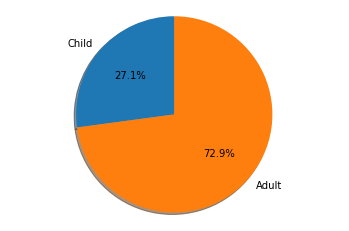

In [59]:
child = byAge_sorted.iloc[:15, 1:2].sum()
adult = byAge_sorted.iloc[15:, 1:2].sum()

labels = 'Child', 'Adult'
sizes = [child, adult]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')

plt.show()

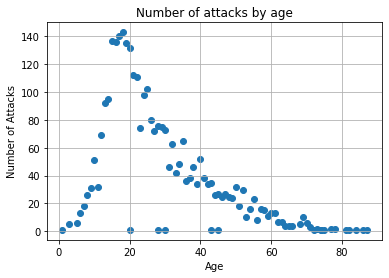

In [58]:
fig, ax = plt.subplots()

x = byAge_sorted['Age']
y = byAge_sorted['Count']
ax.scatter(x, y)

plt.xlabel('Age')
plt.ylabel('Number of Attacks')
plt.title('Number of attacks by age')
plt.grid()
plt.show()

**Answer 2**

No, based on these data children are not more likely to be attacked than adults.More people of 18 or older (adults) were attacked than children (people younger than 18).

I found it interesting though to see that the peak of attacks lies at 18, so it seems that age-group between 15-20 are attacked most often. 

Missing data includes data that was not filled in and data containing strings. However, the difference between the children and adults of data that is available is significantly different, and I assumed that this trend is representative for all attacks.

# Question 3
Are shark attacks where sharks were provoked more or less dangerous?

In [61]:
fatalAttacks_types =  df3[(df3['Fatal (Y/N)'] == 'Y') | (df3['Fatal (Y/N)'] == 'N')]
fatalAttacks_types = fatalAttacks_types[(fatalAttacks_types.Type == 'Provoked') | (fatalAttacks_types.Type == 'Unprovoked')]
fatalAttacks_types = fatalAttacks_types.groupby(['Type','Fatal (Y/N)'])['Species '].count().reset_index()

fatalAttacks_types[' '] = fatalAttacks_types['Fatal (Y/N)'].map(attack_map)
fatalAttacks_types = fatalAttacks_types.rename(columns={'Species ':"Count"}) 


fig = px.bar(fatalAttacks_types, x='Type', y='Count', labels={'Type':' ','Count':'Number of Attacks'}, 
             title ='Provoked or unprovoked incidents are fatal or non-fatal', color = ' ')

fig.show()

**Answer 3**

Shark attacks where sharks were provoked were less dangerous than shark attacks that were unprovoked.

From the provoked attacks only 7 were fatal, while from the unprovoked incidents almost 400 were fatal.

# Question 4.
Are certain activities more likely to result in a shark attack?

In [39]:
activityAttack = df5['Activity'].value_counts().reset_index().rename(columns={'Activity':'Count','index':'Activity'})
#activityAttack
top10_activity = activityAttack.iloc[:10]
top10_activity

Activity  Count
0       Surfing    925
1      Swimming    772
2       Fishing    408
3  Spearfishing    304
4       Bathing    148
5        Wading    138
6        Diving    110
7      Standing     98
8    Snorkeling     87
9  Scuba diving     63

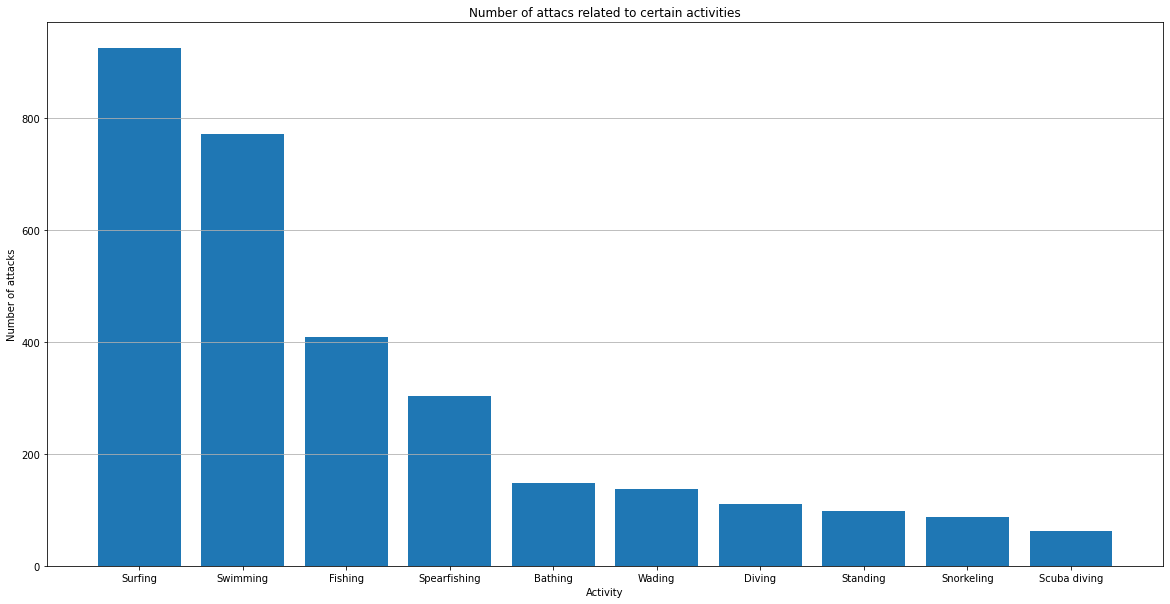

In [40]:
fig, ax = plt.subplots()

# activityAttack = df5.groupby('Activity')['Activity'].count().sort_values(ascending=False)[:10]
top10_activities = top10_activity['Activity']
number = top10_activity['Count']

plt.bar(top10_activities, number)
plt.xlabel('Activity')
plt.ylabel('Number of attacks')
plt.title('Number of attacs related to certain activities')
plt.grid(True, axis='y')
fig.set_size_inches(20,10)
plt.show()

**Answer 4**

Based on the plot with 10 activities that lead to most attacks, it seems that certain activities lead to more attacks. Most attacks happened during surfing and swimming.